## ML INTRO PRACTICA (I): Fase Inicial 

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from bootcampviztools import pinta_distribucion_categoricas, plot_categorical_numerical_relationship, plot_grouped_histograms, plot_combined_graphs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


![Captura de pantalla 2024-01-18 115534.png](<attachment:Captura de pantalla 2024-01-18 115534.png>)
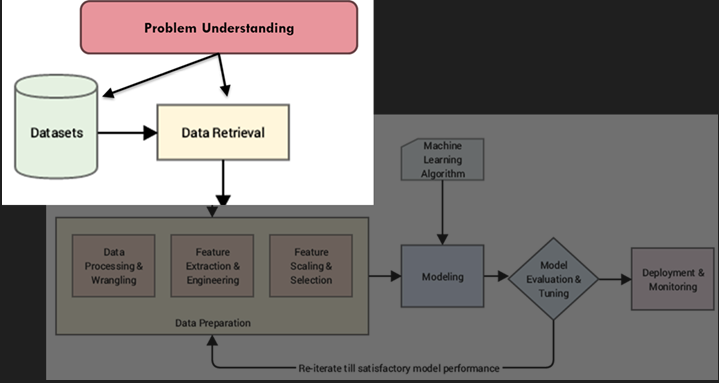

1. Lo primero es saber qué queremos resolver: Problema de negocio vs Problema técnico

2. Lo siguiente es entender que datos tenemos y podemos tener

3. Distinguir entre feature y target

4. Separar entre Train y Test

### 1. El problema de "Negocio"

En nuestro caso la compañía "California Real State Investment Funds" quiere mejorar sus inversiones inmobiliarias para fondos privados. Para ello quiere mejorar su estimación de precios de posibles adquisiciones de viviendas y así escoger mejor sus inversiones y negociar también con ventaja en la adquisición. En concreto le gustaría saber cuál podría ser el precio medio de una casa en una zona de California determinada por una serie de características como su localización, antigüedad media de las casas de la zona, población de la zona, etc.

**Tendremos que traducir nuestro problema de negocio en un problema técnico**

En este caso, parece claro que queremos predecir el precio medio de una casa en una zona determinada. Pero, no vale solo con eso, tendremos que saber en función de qué factores (features) concretos (no sólo una lista "vaga" o "incompleta"), con que margen de error tendríamos un modelo aceptable es decir una métrica de evaluación, tendremos que definir que tipo de aprendizaje (supervisado o no supervisado, por refuerzo...), etc, etc. ¿Cómo se obtiene esto? Preguntando y deduciendo. Lo iremos haciendo poco a poco. Supongamos que ya nos ha contestado al objetivo de negocio y además nos han dicho que nuestro sistema debe ayudar a los analistas de precios que luego introducirán el dato en otro sistema. Estos analistas ya tienen su propia forma de hacer los cálculos, con lo que podrán servirnos como "modelo de referencia" o baseline... Pero son muchas cosas... vayamos por partes... 


Hagamos nuestra cheklist:

* Objetivo de negocio [X] check
* Objetivo tecnico [X] check
* Tipo de modelado (supervisado, no supervisado) [] pending
* Features [] pending
* Target, si hay [] pending
* Tipo de problema (clasificación, regresión, etc) [] pending
* Métrica de Evaluacion [] pending
* Separación Train-Test [] pending


Preguntamos y "California Real State Investment Funds" posee un dataset de muchas zonas con sus precios reales. Y además nos dice que las variables de ese dataset puede tenerlas para cualquier zona futura que quiera valorar.

Pues manos a la obra, hay que conseguir los datos...

### 2. Obtener los datos y echar "un primer vistazo"

Para simplificar este ejemplo, suponemos que tenemos acceso directo a los datos que ese encuentra en un fichero. Es hora de leerlo y antes de importar nuestras librerías (observa que hay un nuevo jugador de equipo):

In [3]:
df_inmo = pd.read_csv("./data/ejemplo_housing.csv")

df_inmo.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df_inmo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


En este momento deberíamos hacernos nuestra tabla con definiciones, tipo de columna y prioridades... Si estuvieramos haciendo un EDA. Ahora nos llega con la definición y con el tipo de variable. Por simplicidad y tiempo no lo vamos a hacer aquí con detalle. Simplemente ver que la mayoría de las variables o columnas son de tipo numérico continuo salvo esa última "OCEAN_PROXIMITY" a la que echaremos un ojo para entenderla mejor.

In [5]:
df_inmo["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

Tenemos cinco etiquetas, con frecuencias diferentes. Me lo apunto para luego. Veamos ahora de un golpe las variables numéricas:

In [6]:
df_inmo.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Más que con los valores, con lo que nos quedamos es que son rangos muy variados (de miles, de dolares, en el "median_house_value", hasta unidades y decenas en "median_income"). Esto tendremos que tratarlo como veremos en un par de sesiones, porque a los algoritmos no le suelen sentar bien estas diferencias tan potentes.

Echemos un vistazo, y digo vistazo, porque todavía no podemos tomar números ni hacer análisis univariantes, simplemente veamos la pinta que tienen las variables.

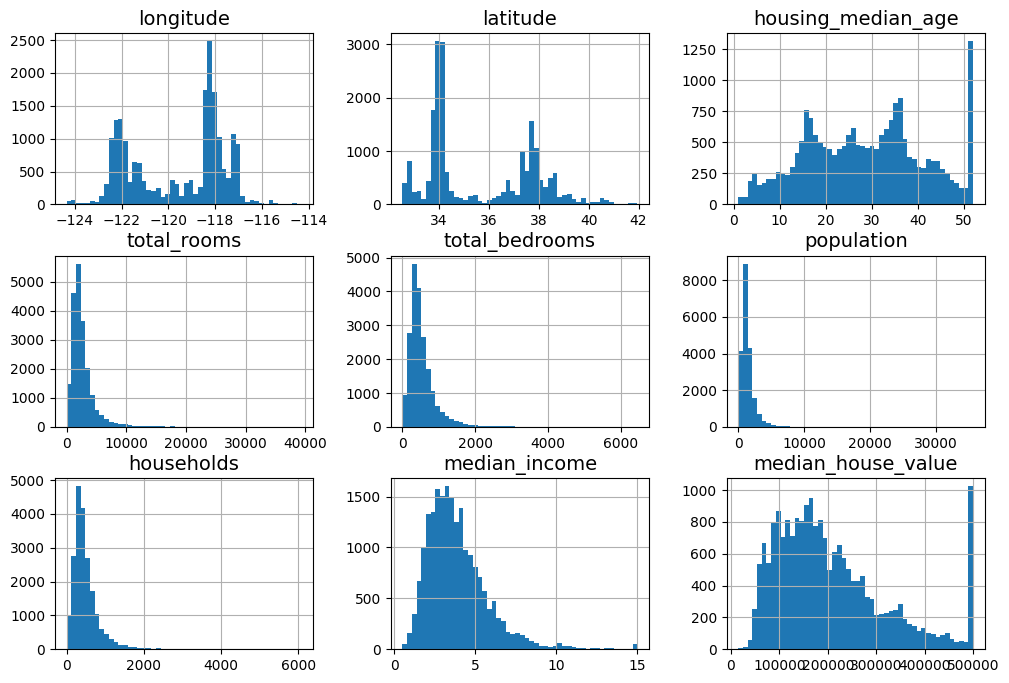

In [7]:

# Código extra para los tamaños de las fuentes y los "ticks" de los ejes, esto no lo vimos al hablar de matplotlib así que una extra
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_inmo.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

Y aquí podemos ver:  

1- El ingreso medio ("median_income") esta claro que no está ni en dólares ni en euros. Tendríamos que preguntar a quien nos dio los datos. En este caso nos dirían que el ingreso se ha traducido a una escala de 0 a 15 (dividiendo por 10000 dolares pero además se han limitado las zonas con ingresos medios por encima de 150000 a 15)  
  
2- Existen más variables donde se han "capado" (puesto límite artificial) como "median_house_value" y "housing_median_age". Esto puede ser un problema porque el modelo puede aprender que no debe dar valores por encima de estos. Aquí hay que preguntar a los "jefes" que quieren hacer y tendremos que decidir (buscar los datos exactos para los capados o pasar de estos valores). Lo trataremos en la fase de tratamiento de Features.

3- Se ve que las escalas (ejes x) son muy diferentes como ya habíamos observado en los números.

4- Hay muchas distribuciones tipo "precio del billete" del Titanic, es decir desplazadas a la izquierda y con aparente larga cola. Esto también puede sentarle mal a nuestros algoritmos de modelado y en sprints posteriores veremos como "normalizar" las dsitribuciones de datos para que los algoritmos creen mejores modelos.

Pues hasta aquí el vistazo, no podemos hacer más si no queremos hacernos trampas. Es hora de separar los problemas de estudio de los problemas de examen. Es decir el train del test. Pero antes completemos nuestro checklist.

### 3. Target, Features, tipo de problema

En este caso tenemos una variable que es "claramente" nuestro target (es decir lo que querremos predecir para zonas nuevas): "mean_house_value". 

Además el tener target (la Y del modelo), nos dice que estamos tratando con un modelado supervisado. 

En principio las features serán el resto de variables, pero puede que luego nos descontemos alguna o transformemos otras. 

Y finalmente, queremos predecir una variable continua con lo que estaremos tratando con un problema de regresión.

En nuestra checklist:


* Objetivo de negocio [X] check
* Objetivo tecnico [X] check
* Tipo de modelado (supervisado, no supervisado): SUPERVISADO [X] check
* Features [] pending (aunque tengamos la base no tenemos las defintivas) 
* Target, si hay: "mean_house_value" [X] check
* Tipo de problema (clasificación, regresión, etc): Regresión [X] check
* Métrica de Evaluacion [] pending [podríamos elegirla ya pero lo dejamos para la fase de evaluación para no alargar la sesión demasiado]
* Separación Train-Test [] pending



### 4. Separar Train y Test

Necesitamos tener un dataset para entrenar, pero sobre todo necesitamos un dataset para poder tener una idea de como va a funcionar el modelo cuando le pasemos datos que no ha visto.


¿Y como se crea un set de Test? Generalmente generando dos muestras aleatorias del dataset de partida. Las cifras típicas son un 80% para train y un 20% para test y la forma de hacerlo rápidamente es acudir a la fución que nos hemos importado:

In [8]:
train_set, test_set = train_test_split(df_inmo, test_size=0.2, random_state=42)

In [9]:
len(train_set)

16346

In [10]:
len(test_set)

4087

## ML INTRO PRACTICA (II): EDA

![Captura de pantalla 2024-01-18 154552.png](<attachment:Captura de pantalla 2024-01-18 154552.png>)
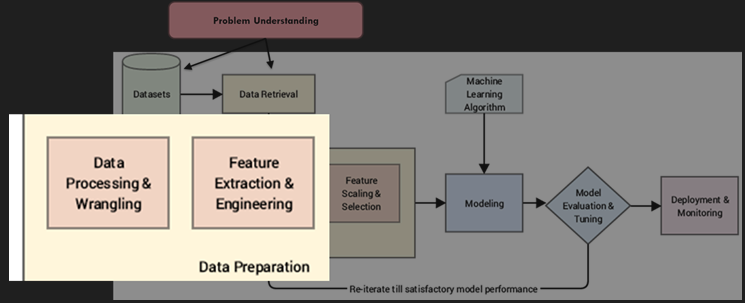

### 1. Limpieza y transformación

Deberíamos acometer la limpieza y transformación, pero como ya vimos no hay valores nulos y los datos parecen bastante limpios

In [11]:
df_inmo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Unicamente parece interesante convertir "mean_income" en una variable categórica, porque ya de por sí se ha intentado hacer un escalado con la misma. Esto es algo que ya hicimos varias veces cuando analizamos datos, recurriendo a la función `cut` de pandas. Hagámoslo:


In [12]:
train_set["income_cat"] = pd.cut(train_set["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

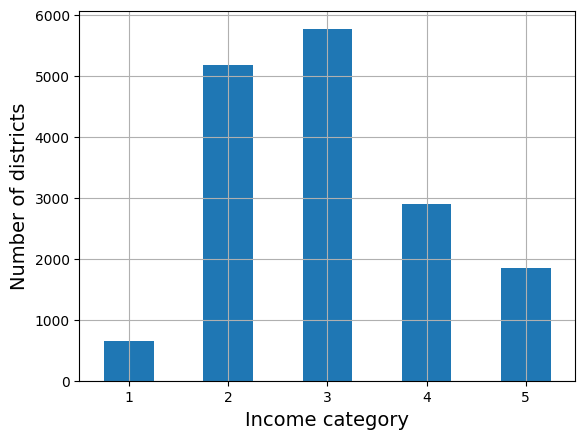

In [13]:
train_set["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

[NOTA: Importante, toda transformación que se haga en las variables de train habrá que hacerlas en los datos de test antes de poder aplicarles el modelo]

### 2. Análisis univariante

En un proceso estricto y formal de ML ahora haríamos el análisis univariante de todas las variables. Por simplicidad vamos a repetir únicamente el código para ver las distribuciones de las numéricas y las frecuencias de las categóricas:

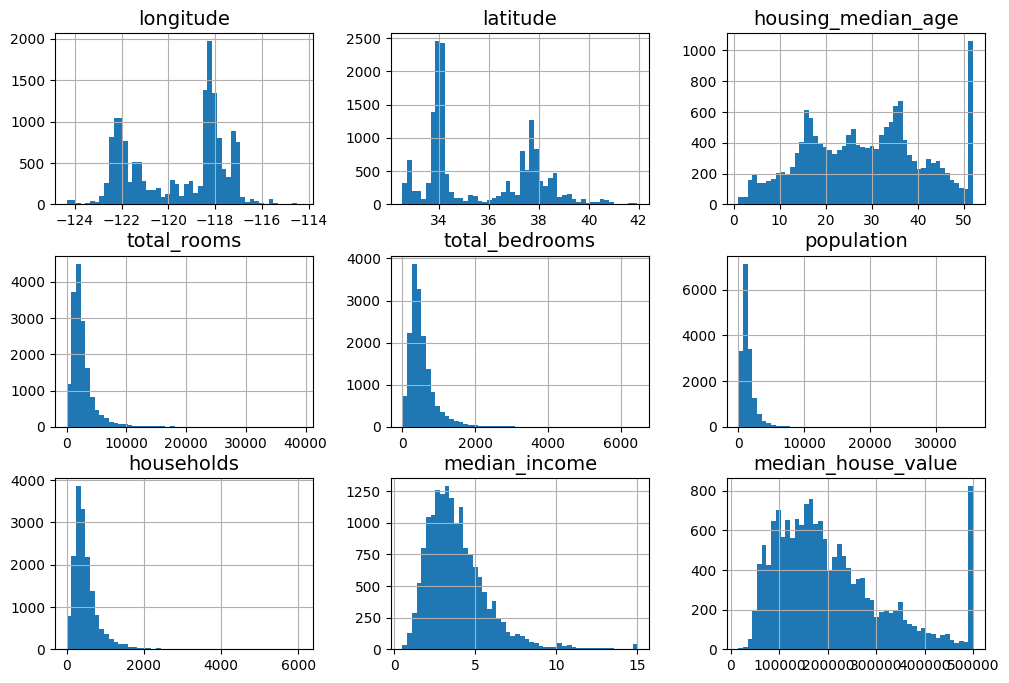

In [14]:
train_set.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

Y las frecuencias:


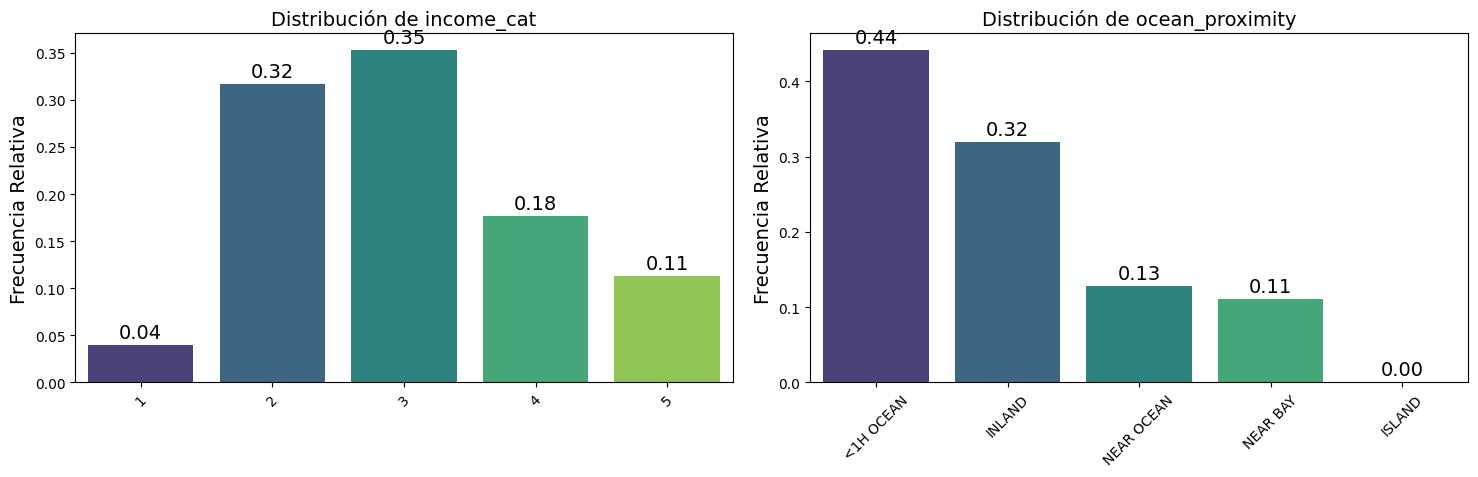

In [15]:
pinta_distribucion_categoricas(train_set, ["income_cat","ocean_proximity"], relativa= True, mostrar_valores= True)

La distribución numérica sigue las mismas pautas, como era de esperar, cuando hicimos el primer vistazo y se mantienen las mismas consideraciones. 

Respecto a las frecuencias, el income de nivel 3 es el más frecuente, el income de nivel 1 el menor y que la mayoría de las zonas no son costeras y además que apenas hay zonas en islas.

No podemos forzar más y tampoco lo necesitamos. Lo realmente importante es ver algunas combinaciones y el bivariante con el target "mean_house_value", eso sí también tendremos que decidir que hacer con los "capados" de esta y de la variable "housing_median_age".

### 2. Análisis Multivariante

#### 2.1 Variables Categóricas vs Target

Empecemos con la proximidad al océano: 

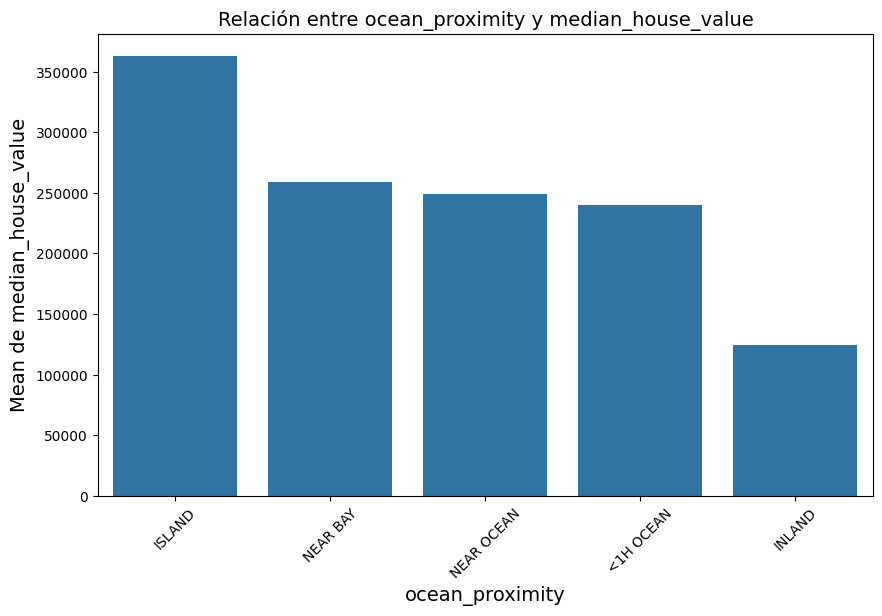

In [16]:
plot_categorical_numerical_relationship(train_set, categorical_col= "ocean_proximity", numerical_col="median_house_value")

Claramente parece que hay relación entre esta variable y el target, me la quedaré como feature. Dado que tenemos los valores geográficos (latitud y longitud), podemos comprobar esta relación y además ver el bivariante con esas dos variables haciendo una visualización:

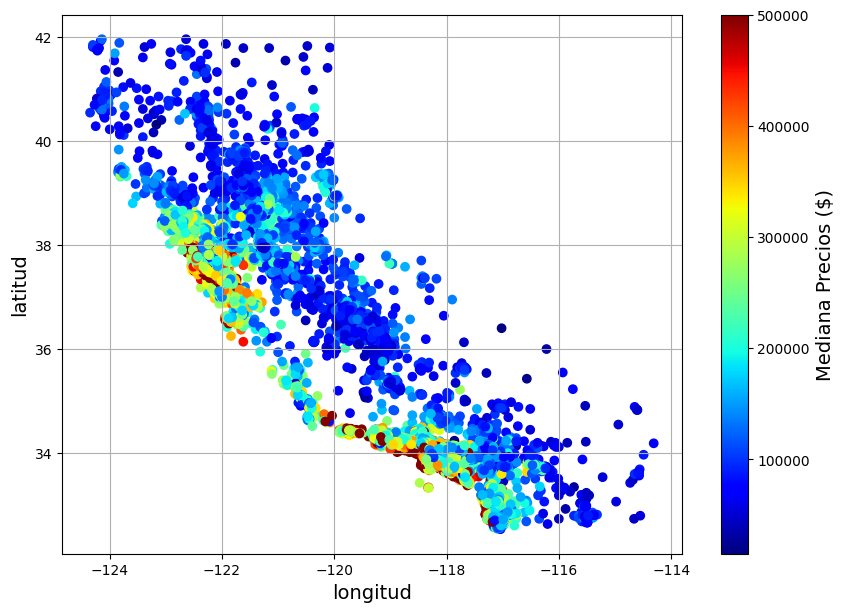

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(train_set["longitude"], train_set["latitude"], c = train_set["median_house_value"], cmap = "jet")
plt.grid()
plt.xlabel("longitud")
plt.ylabel("latitud")
cbar = plt.colorbar(label = "Mediana Precios ($)")


[EXTRA: Usando pandas directamente y añadiendo la población como tamaño de la burbuja]

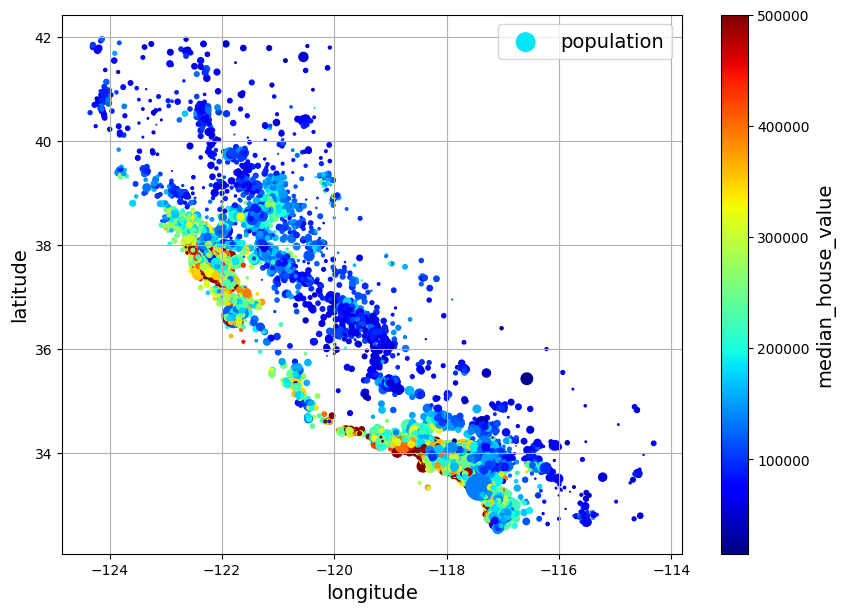

In [18]:
train_set.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=train_set["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

Seguramente podríamos hasta simplificar la variable en dos o tres valores (costero, no costero, isla). Pero no lo vamos a hacer.

c:\Users\lucas\Desktop\The Bridge\Git\ONLINE_DS_THEBRIDGE_-Ejercicios_Lucas_Zamora-\Apuntes\Machine_Learning\bootcampviztools.py:109: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].mean()


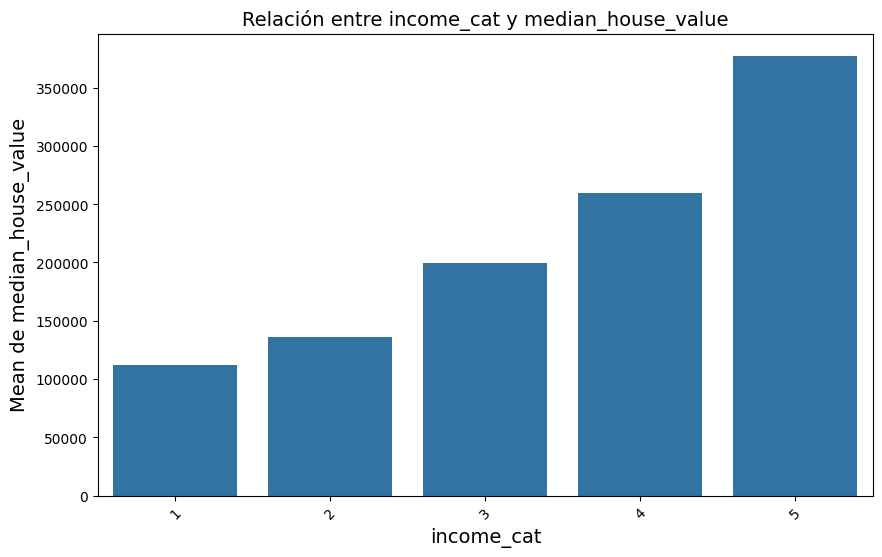

In [19]:
plot_categorical_numerical_relationship(train_set, categorical_col= "income_cat", numerical_col="median_house_value")

No hace falta decir nada no. Ahora cuando veamos las relaciones numéricas, lo veremos con el "mean_income". Esta es otra variable que nos quedaremos como feature.

#### 2.2 Variables numéricas y target

Por simplificar, directamente iremos a las correlaciones de las variables numéricas con la variable target y pintando las más significativas:

In [20]:
corr_matrix = train_set.corr(numeric_only= True)
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687342
total_rooms           0.134610
housing_median_age    0.107896
households            0.067969
total_bedrooms        0.053060
population           -0.020492
longitude            -0.046563
latitude             -0.143382
Name: median_house_value, dtype: float64

Como era de esperar "median_income" es claramente la que tiene más correlación, y podríamos descartar población y las geográficas que hemos visto que hasta cierto punto están contenidas en la categórica de cercanía al mar (quizás la latitud podríamos quedárnosla)

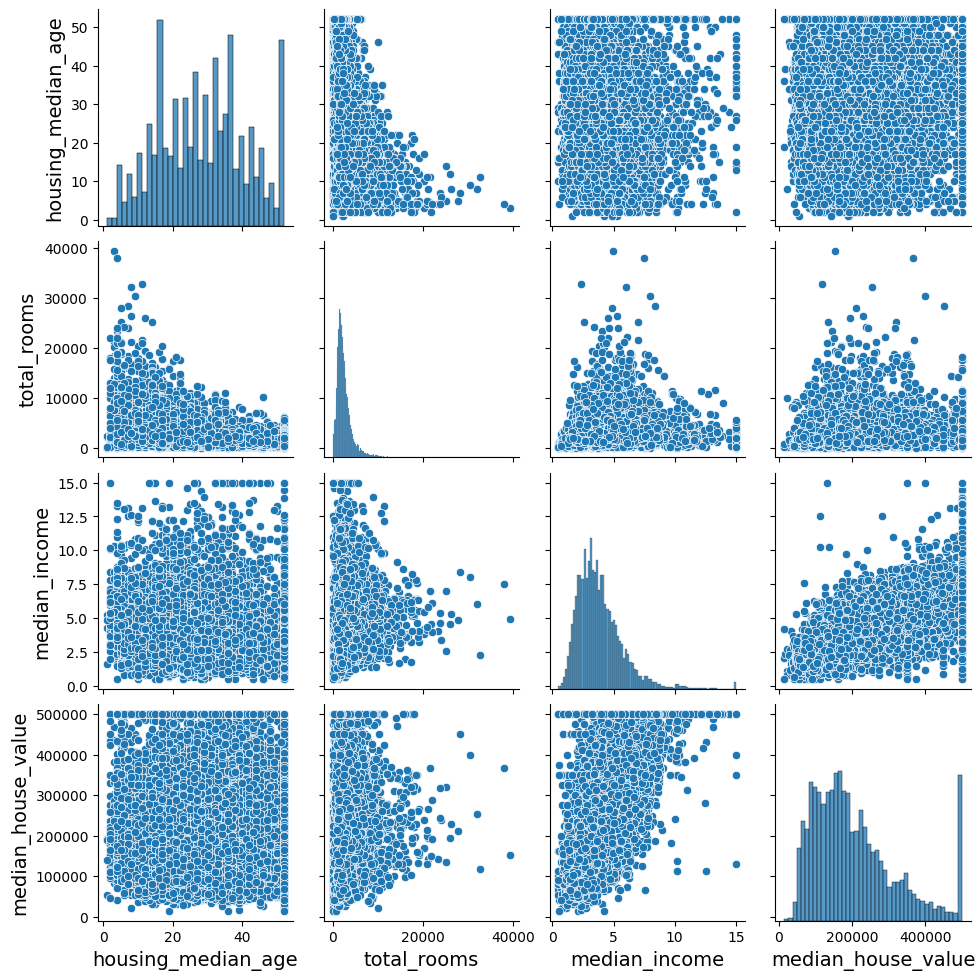

In [21]:
columnas = corr_matrix["median_house_value"][corr_matrix["median_house_value"] > 0.07].index.to_list()

sns.pairplot(train_set[columnas]);

Como era de esperar gráficamente la "posible" correlación más potente es con "median_income". Pero en este caso no vamos a descartar las otras, y nos quedaremos con la categórica en vez de con "median_income". 

### 2.3 Crear otras variables

En este caso, podríamos pensar que quizás algunas variables combinadas puedan ser interesantes por ejemplo:  
1. El número medio de habitaciones por casa ("total_rooms"/"households")  
2. El número de dormitorios en función del total de habitaciones ("total_bedrooms"/"total_rooms")
3. O el número medio de personas por casas ("population"/"housholds")

Creemos estas variables y veamos su correlación con el target

In [22]:
train_set["rooms_per_house"] = train_set["total_rooms"] / train_set["households"]
train_set["bedrooms_ratio"] = train_set["total_bedrooms"] / train_set["total_rooms"]
train_set["people_per_house"] = train_set["population"] / train_set["households"]

In [23]:
corr_matrix = train_set.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687342
rooms_per_house       0.151574
total_rooms           0.134610
housing_median_age    0.107896
households            0.067969
total_bedrooms        0.053060
population           -0.020492
people_per_house     -0.021595
longitude            -0.046563
latitude             -0.143382
bedrooms_ratio       -0.252579
Name: median_house_value, dtype: float64

Hmm, interesante porque hemos encontrado una "mejor" correlación en habitaciones por casa "rooms_per_house" pero más interesante es la nueva variable ratio de dormitorios, que presenta una contraintuitiva "anticorrelación". Es decir a menor ratio de dormitorios por habitaciones mayor precio.

### 3. Lista de Features

Para terminar, hacemos nuestra lista de features [Nota: A medida que veamos algoritmos y más llegados a las redes, dejaremos que sea el modelo el que se encargue incluso de esta selección pero es bueno que lo practiquemos y lo entendamos]

1. ocean_proximity
2. income_cat
3. rooms_per_house
4. total_rooms
5. housing_median_age
6. bedrooms_ratio

## ML INTRO PRACTICA (III): Preparación de Features Categóricas

In [24]:
# Recuperemos lo hecho en la sesión anterior

# Código extra para los tamaños de las fuentes y los "ticks" de los ejes, esto no lo vimos al hablar de matplotlib así que una extra
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


df_inmo = pd.read_csv("./data/ejemplo_housing.csv")

train_set, test_set = train_test_split(df_inmo, test_size=0.2, random_state=42)

train_set["income_cat"] = pd.cut(train_set["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

train_set["rooms_per_house"] = train_set["total_rooms"] / train_set["households"]
train_set["bedrooms_ratio"] = train_set["total_bedrooms"] / train_set["total_rooms"]

features = ["ocean_proximity", "income_cat", "rooms_per_house","total_rooms","housing_median_age","bedrooms_ratio"]

target = "median_house_value"

![Captura de pantalla 2024-01-19 093702.png](<attachment:Captura de pantalla 2024-01-19 093702.png>)
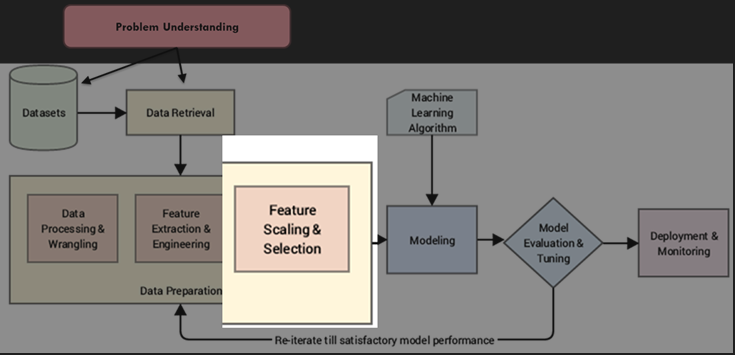

### 1. Tratamiento de variables categóricas

In [25]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16346 entries, 17560 to 15795
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16346 non-null  float64 
 1   latitude            16346 non-null  float64 
 2   housing_median_age  16346 non-null  float64 
 3   total_rooms         16346 non-null  float64 
 4   total_bedrooms      16346 non-null  float64 
 5   population          16346 non-null  float64 
 6   households          16346 non-null  float64 
 7   median_income       16346 non-null  float64 
 8   median_house_value  16346 non-null  float64 
 9   ocean_proximity     16346 non-null  object  
 10  income_cat          16346 non-null  category
 11  rooms_per_house     16346 non-null  float64 
 12  bedrooms_ratio      16346 non-null  float64 
dtypes: category(1), float64(11), object(1)
memory usage: 1.6+ MB


Para poder aplicar los algoritmos de generación de modelos necesitamos convertir las categorías o valores de las variables categóricas en números de alguna forma. Vamos a ver dos para transformar "ocean_proximity" e "income_cat" que tiene el tipo category (que algunos algoritmos maneja pero otros no)

#### 1.1 Ordinal Encoding

Una primera forma de convertir los valores de una categoría es utilizar un "codificador ordinal" o "Ordinal Encoder" que convertira cada valor de la categoría en un número entero. El problema es que automáticamente se establece una relación de orden que no necesariamente tiene por qué existir:

In [26]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
train_set["ordinal_ocean"] = ordinal_encoder.fit_transform(train_set[["ocean_proximity"]]) #--> doble corchete porque le pasamos un DF

In [27]:
train_set[["ordinal_ocean","ocean_proximity"]].sample(10)

,ordinal_ocean,ocean_proximity
6250,0.0,<1H OCEAN
9341,1.0,INLAND
16807,4.0,NEAR OCEAN
17672,1.0,INLAND
4537,0.0,<1H OCEAN
519,1.0,INLAND
16229,3.0,NEAR BAY
1379,0.0,<1H OCEAN
10835,0.0,<1H OCEAN
4180,0.0,<1H OCEAN


In [28]:
ordinal_encoder.categories_ #---> Así podemos ver el orden que asigna a los valores

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

El caso de "ocean_proximity" quizá sea de esos en los que establecer un orden no sea ni claro ni oscuro, ni sí ni no, porque si hay una relación de distancia al mar. Pero tendríamos que forzarlo

In [29]:
# Ordenar las categorias

categories = [["ISLAND","NEAR OCEAN","NEAR BAY","<1H OCEAN","INLAND"]]
ordinal_encoder = OrdinalEncoder(categories= categories)
train_set["ordinal_ocean"] = ordinal_encoder.fit_transform(train_set[["ocean_proximity"]])

In [37]:
train_set[["ordinal_ocean","ocean_proximity"]].sample(10)

,ordinal_ocean,ocean_proximity
8104,3.0,<1H OCEAN
5717,3.0,<1H OCEAN
7935,3.0,<1H OCEAN
11900,4.0,INLAND
15767,3.0,<1H OCEAN
11862,1.0,NEAR OCEAN
4362,1.0,NEAR OCEAN
2259,3.0,<1H OCEAN
15392,4.0,INLAND
19771,2.0,NEAR BAY


In [30]:
train_set.ordinal_ocean.value_counts()

ordinal_ocean
3.0    7219
4.0    5212
1.0    2101
2.0    1810
0.0       4
Name: count, dtype: int64

En el caso de "income_cat" tiene más sentido porque en sí es una categórica ordinal:


In [38]:
train_set.income_cat.value_counts()

income_cat
3    5771
2    5182
4    2892
5    1847
1     654
Name: count, dtype: int64

No vamos a tocarla, si es necesario para los algoritmos que usemos cambiaremos el tipo sobre la marcha.

#### 1.2 One-Hot Encoding

Cuando no estamos seguros o no queremos convertir una variable categórica en una variable ordinal numérica, una alternativa es hacer lo que hicimos con los géneros de las películas en el sprint dedicado al Algebra y Numpy [si hace miles de años] que convertíamos cada valor categórico en un 1 o un cero dentro de un vector. Sólo que ahora no es un vector sino que cada valor posible de la variable categórica se va a convertir en una nueva columna que tendrá valor 0 o 1 si la zona (la instancia) cumple con ese valor. Veámoslo

In [39]:
pd.get_dummies(train_set, columns=["ocean_proximity"]).head() #--> Transforma la columna a diferentes columnas tipo bool

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_house,bedrooms_ratio,ordinal_ocean,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17560,-117.96,34.00,34.0,2777.0,540.0,1954.0,522.0,4.5163,183800.0,4,5.319923,0.194454,3.0,True,False,False,False,False
2045,-122.81,38.54,12.0,2289.0,611.0,919.0,540.0,1.1553,139300.0,1,4.238889,0.266929,3.0,True,False,False,False,False
6383,-122.25,37.77,52.0,2650.0,566.0,1468.0,567.0,3.0161,215700.0,3,4.673721,0.213585,2.0,False,False,False,True,False
4574,-117.98,33.86,25.0,1025.0,266.0,726.0,183.0,3.8750,137500.0,3,5.601093,0.259512,3.0,True,False,False,False,False
15118,-119.70,34.43,35.0,1402.0,369.0,654.0,385.0,2.6205,318800.0,2,3.641558,0.263195,3.0,True,False,False,False,False


In [40]:
pd.get_dummies(train_set, columns=["ocean_proximity"], dtype= int).head() #--> Añadiendo dtype = INT lo transforma en 0 y 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_house,bedrooms_ratio,ordinal_ocean,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17560,-117.96,34.00,34.0,2777.0,540.0,1954.0,522.0,4.5163,183800.0,4,5.319923,0.194454,3.0,1,0,0,0,0
2045,-122.81,38.54,12.0,2289.0,611.0,919.0,540.0,1.1553,139300.0,1,4.238889,0.266929,3.0,1,0,0,0,0
6383,-122.25,37.77,52.0,2650.0,566.0,1468.0,567.0,3.0161,215700.0,3,4.673721,0.213585,2.0,0,0,0,1,0
4574,-117.98,33.86,25.0,1025.0,266.0,726.0,183.0,3.8750,137500.0,3,5.601093,0.259512,3.0,1,0,0,0,0
15118,-119.70,34.43,35.0,1402.0,369.0,654.0,385.0,2.6205,318800.0,2,3.641558,0.263195,3.0,1,0,0,0,0


In [ ]:
train_set_bck = train_set.copy()
train_set = pd.get_dummies(train_set, columns = ["ocean_proximity"], dtype = int)

Y con eso tendríamos preparadas las columnas categóricas. Es hora de "escalar" y convertir las distribuciones de las numéricas

## ML INTRO PRACTICA (IV): Preparación de Features Numéricas

Con escasas excepciones, la mayoría de los algoritmos de machine learning para construir modelos no funcionan bien cuando las variables y features numéricas tienen escalas y rangos de valores muy diferentes. Si no "escalamos" (igualamos escalas) lo que suele pasar es que lo algoritmos "pasan" de considerar las variables con menores rangos o valores más pequeños y se centran en las variables numéricas con rangos superiores.

Hay dos formas de "escalar" o asimilar los rangos: escalado min-max (*min-max scaling*) y la estandardización (*standardization*)

### 1. Min-Max Scaling

También se le conoce como normaización es el algoritmo más sencillo y lo que hace es transformar los rangos de las variables numéricas para que estos esten entre 0 y 1 (aunque el método que vamos a usar permite cambiar el rango, por ejemplo entre -1 y 1):

$$ \hat x_i = \frac{x_i - x_{min}}{x_{max} - x_{min}}$$

In [42]:
from sklearn.preprocessing import MinMaxScaler

features_num = ["rooms_per_house","total_rooms","housing_median_age","bedrooms_ratio"]
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
resultado_min_max = pd.DataFrame(min_max_scaler.fit_transform(train_set[features_num]), columns= features_num)
resultado_min_max

,rooms_per_house,total_rooms,housing_median_age,bedrooms_ratio
0,-0.932682,-0.859032,0.294118,-0.790101
1,-0.949105,-0.883858,-0.568627,-0.629047
2,-0.942499,-0.865493,1.000000,-0.747589
3,-0.928410,-0.948161,-0.058824,-0.645528
4,-0.958180,-0.928982,0.333333,-0.637343
...,...,...,...,...
16341,-0.936574,-0.947754,-0.098039,-0.815639
16342,-0.947496,-0.897746,0.372549,-0.665564
16343,-0.952376,-0.757338,-0.137255,-0.609901
16344,-0.948739,-0.933510,0.058824,-0.682322


In [43]:
resultado_min_max.describe()

,rooms_per_house,total_rooms,housing_median_age,bedrooms_ratio
count,16346.000000,16346.000000,16346.000000,16346.000000
mean,-0.931223,-0.865835,0.082591,-0.748855
std,0.034885,0.112708,0.494526,0.128182
min,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.946083,-0.926578,-0.333333,-0.831830
50%,-0.934000,-0.892201,0.098039,-0.770856
75%,-0.921663,-0.840578,0.411765,-0.689278
max,1.000000,1.000000,1.000000,1.000000


No igualamos todavía porque nos queda un detalle por ver sobre las distribuciones tipo *heavy-tail* (como las que hemos visto para precios, ingresos y demás en bastantes datasets)

### 2. Standardization

Hace la siguiente transformación para cada valor de una variable numérica X:

$$x_i = \dfrac{x - \bar x}{s_x}\ \text{,donde } s_x \text{ es la desviación estándar de la variable numérica}$$

In [49]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
resultado_standardization = pd.DataFrame(std_scaler.fit_transform(train_set[features_num]),columns = features_num)
resultado_standardization.head()

,rooms_per_house,total_rooms,housing_median_age,bedrooms_ratio
0,-0.041816,0.060356,0.427749,-0.321791
1,-0.512619,-0.159918,-1.316896,0.934699
2,-0.323245,0.003031,1.855185,0.009874
3,0.080636,-0.730463,-0.285969,0.806117
4,-0.772764,-0.560292,0.507051,0.869973


In [50]:
resultado_standardization.describe()

,rooms_per_house,total_rooms,housing_median_age,bedrooms_ratio
count,1.634600e+04,1.634600e+04,1.634600e+04,1.634600e+04
mean,4.042608e-17,6.346460e-17,1.912632e-17,1.753970e-16
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00
min,-1.971583e+00,-1.190419e+00,-2.189218e+00,-1.959350e+00
25%,-4.259837e-01,-5.389643e-01,-8.410835e-01,-6.473450e-01
50%,-7.961065e-02,-2.339439e-01,3.123857e-02,-1.716490e-01
75%,2.740394e-01,2.240945e-01,6.656546e-01,4.647986e-01
max,5.536109e+01,1.655516e+01,1.855185e+00,1.364397e+01


En este caso lo que se busca es que la media sea 0 o casi y la desviación estándar 1 o casi. Este escalado no impone restricciones al rango y le afectan menos los outliers.  

De nuevo no tocamos nada todavía... Veamos por qué:

### 3. Transformado de distribuciones

Si nos fijamos en distribuciones tipo "total_rooms":


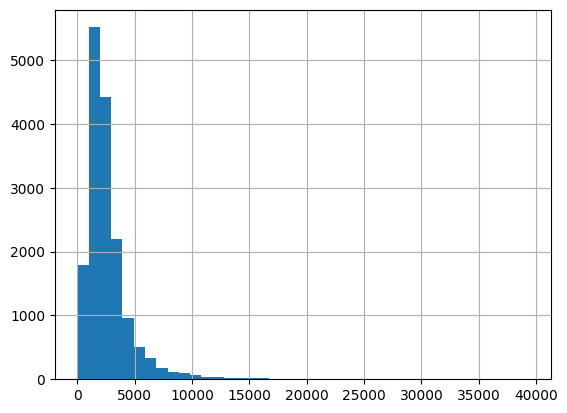

In [52]:
train_set["total_rooms"].hist(bins = 40);

Vemos ese efecto *heavy-tail* que hemos contemplado en otras distribuciones y que provoca que cuando escalemos los valores se van a concentrar en rangos muy pequeños:

In [53]:
resultado_min_max["total_rooms"].describe()

count    16346.000000
mean        -0.865835
std          0.112708
min         -1.000000
25%         -0.926578
50%         -0.892201
75%         -0.840578
max          1.000000
Name: total_rooms, dtype: float64

In [54]:
resultado_min_max.total_rooms.quantile(0.90)

-0.7626545251055603

Hemos concentrado el 90% de los valores entre -1 y -0.76, pero todavía quedan valores entre -0.76 y 1. Esto le sienta mal en general a los algoritmos de Machine Learning y por eso primero hacemos una transformación de las variables tipo "total_rooms":

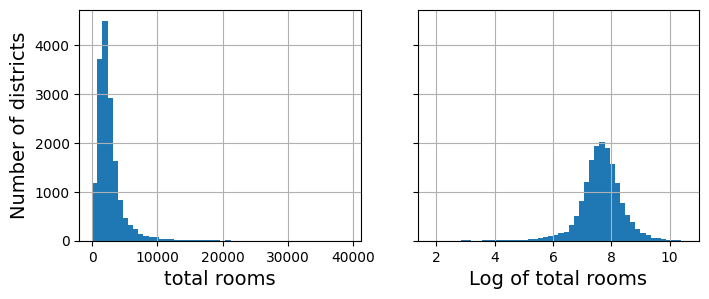

In [55]:
# extra code – this cell generates Figure 2–17
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
train_set["total_rooms"].hist(ax=axs[0], bins=50)
train_set["total_rooms"].apply(np.log).hist(ax=axs[1], bins=50) #--> Transforma en logaritmica
axs[0].set_xlabel("total rooms")
axs[1].set_xlabel("Log of total rooms")
axs[0].set_ylabel("Number of districts")
plt.show()

Y ahora sobre la transformada aplicaríamos el min_max o el escalado:

In [56]:
train_set["log_total_room"] = train_set["total_rooms"].apply(np.log)
train_set["total_room_tr"] = min_max_scaler.fit_transform(train_set[["log_total_room"]])

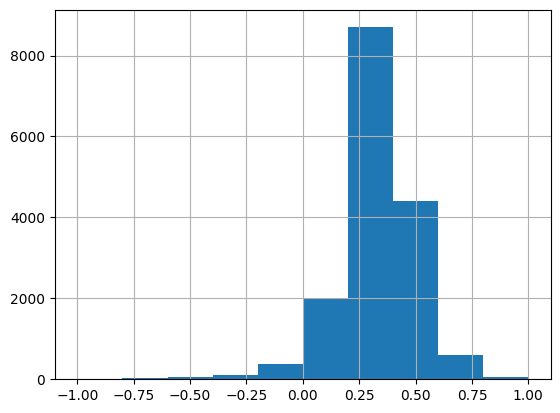

In [58]:
train_set["total_room_tr"].hist();

### 4. Aplicamos todas las transformaciones

Primero veamos si es conveniente aplicar la transformación logarítmica en alguna otra variable:

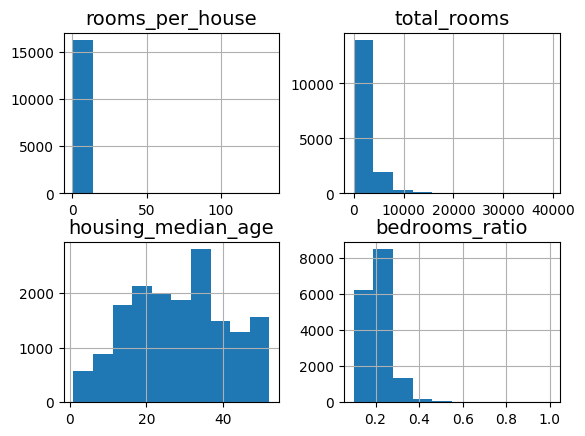

In [60]:
f_num = ["rooms_per_house","total_rooms","housing_median_age","bedrooms_ratio"]
train_set[f_num].hist();

Es necesario aplicarla a "bedrooms_ratio", lo que podía ser  de esperar porque depende de "total_rooms". Pero también observamos que hay un outlier o varios en "rooms_per_house" que deberíamos tratar: 

In [61]:
train_set.rooms_per_house.describe()

count    16346.000000
mean         5.415940
std          2.296221
min          0.888889
25%          4.437817
50%          5.233142
75%          6.045176
max        132.533333
Name: rooms_per_house, dtype: float64

(2,)


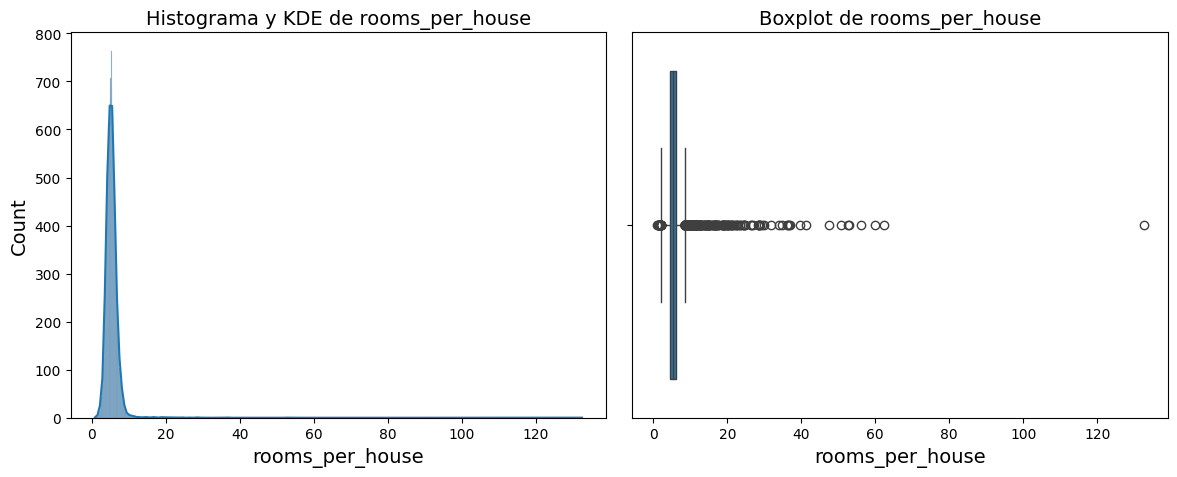

In [64]:
plot_combined_graphs(train_set, ["rooms_per_house"])

Aplicaremos la transformación a todas ellas:

In [65]:

for col in ["rooms_per_house","total_rooms","bedrooms_ratio"]:
    train_set[f"log_{col}"] = train_set[col].apply(np.log)
    train_set[col] = min_max_scaler.fit_transform(train_set[[f"log_{col}"]])

train_set["housing_median_age"] = min_max_scaler.fit_transform(train_set[["housing_median_age"]])

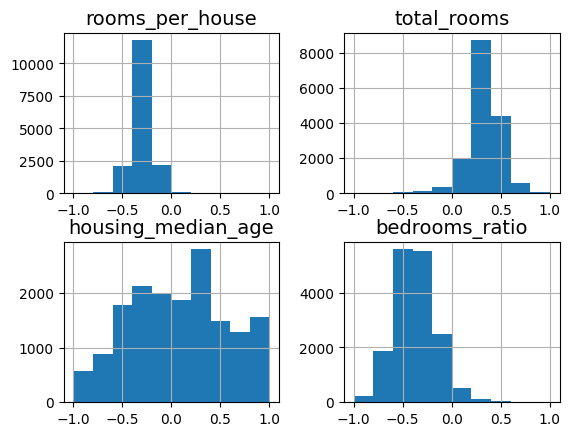

In [67]:
f_num = ["rooms_per_house","total_rooms","housing_median_age","bedrooms_ratio"]
train_set[f_num].hist();